In [18]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X_train:(1000, 10), X_mean:(1000,) y_true:(1000,), y_pred:(1000,)


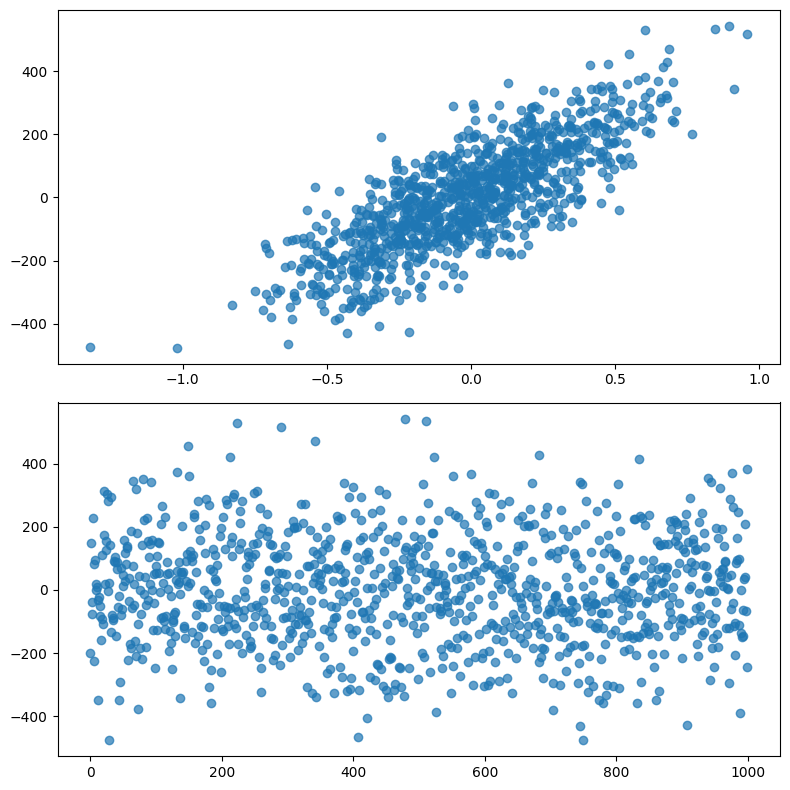

In [25]:
n_features = 10 
n_samples = 1000
n_iterations = 30
learning_rate = .05

X_train, y_true_train = make_regression(n_samples=n_samples, n_features=n_features)
y_pred_train = np.zeros(shape=n_samples)
loss_values = []

X_mean = np.mean(X_train, axis=1)

print(f'X_train:{X_train.shape}, X_mean:{X_mean.shape} y_true:{y_true_train.shape}, y_pred:{y_pred_train.shape}')

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(X_mean, y_true_train, label='True', alpha=0.7)
plt.subplot(2, 1, 2)
plt.scatter(range(n_samples), y_true_train, label='True', alpha=0.7)
plt.tight_layout()
plt.show()

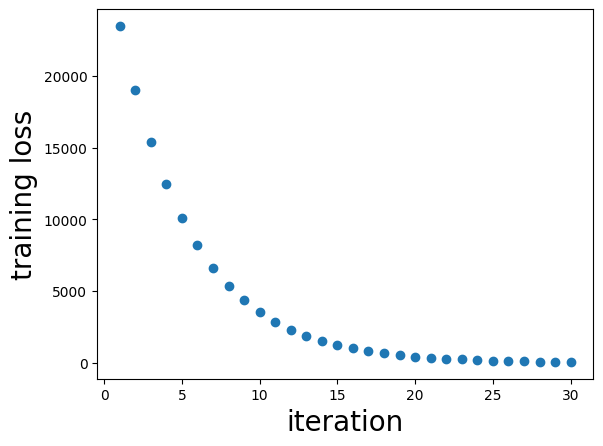

In [16]:
def least_squares_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def compute_gradient_of_loss(y_true, y_pred):
    # Gradient of LS loss w.r.t y_pred
    return -2 * (y_true - y_pred)

# Gradient descent on the predictions. Note how similar that is to the
# gradient descent on theta above.
for m in range(n_iterations):
    negative_gradient = -compute_gradient_of_loss(y_true_train, y_pred_train)
    y_pred_train += learning_rate * negative_gradient
    # save loss value for plotting
    loss_values.append(least_squares_loss(y_true_train, y_pred_train))

plt.plot(np.arange(n_iterations) + 1, loss_values, 'o')
plt.xlabel('iteration', fontsize=20)
plt.ylabel('training loss', fontsize=20)
plt.show()